In [127]:
import random
import time
import numpy as np

class Graph:
    
    def __init__(self, vertices):
        self.V = vertices # No. of vertices
        self.graph = [] # to store graph
#         self.parent = []
#         self.rank = []
        self.parent = np.arange(0,self.V,1) 
        self.rank = [0] * self.V
        
    def set_graph(self, dimension):
        
        if dimension == 0:
#             bar = 0.5/(np.log2(self.V))**2
            for i in range(self.V):
                res = np.random.rand(self.V-i-1)
                p = np.arange(i+1,self.V,1)
                for u, value in zip(p,res):
                    self.graph.append([i, u, value])
#                 print(i, end = '\r')
          
        if dimension == 2:
            for i in range(self.V):
                x1 = np.random.rand(self.V-i-1)
                x2 = np.random.rand(self.V-i-1)
                res = (x1**2+x2**2)**0.5
                p = np.arange(i+1,self.V,1)
                for u, value in zip(p,res):
                    self.graph.append([i, u, value])
                    
        if dimension == 3:
            for i in range(self.V):
                x1 = np.random.rand(self.V-i-1)
                x2 = np.random.rand(self.V-i-1)
                x3 = np.random.rand(self.V-i-1)
                res = (x1**2+x2**2+x3**2)**0.5
                p = np.arange(i+1,self.V,1)
                for u, value in zip(p,res):
                    self.graph.append([i, u, value])
        
        if dimension == 4:
            for i in range(self.V):
                x1 = np.random.rand(self.V-i-1)
                x2 = np.random.rand(self.V-i-1)
                x3 = np.random.rand(self.V-i-1)
                x4 = np.random.rand(self.V-i-1)
                res = (x1**2+x2**2+x3**2+x4**2)**0.5
                p = np.arange(i+1,self.V,1)
                for u, value in zip(p,res):
                    self.graph.append([i, u, value])
                    
        
    
    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]
    
    def link(self, i, j):
        if self.rank[i] > self.rank[j]:
            self.parent[j] = i
        if self.rank[i] < self.rank[j]:
            self.parent[i] = j
        if self.rank[i] == self.rank[j]:
            self.parent[j] = i
            self.rank[i] += 1
     
    def union(self,i,j):
        self.link(self.find(i), self.find(j))

    def kruskal(self):
        mst = []
        self.graph = sorted(self.graph, key=lambda item: item[2])
        self.parent = np.arange(0,self.V,1) 
        self.rank = [0] * self.V
#         i = 0
        for edge in self.graph:
            if self.find(edge[0]) != self.find(edge[1]):
                mst.append(edge[2])
                self.union(edge[0], edge[1])
#             i += 1   
#             print(i, end = '\r')
        return mst

In [128]:
if __name__ == "__main__":
    # seed = [2, 15, 53, 77, 113]
    import pandas as pd
    trial = 1
    timeRec = []
    for n in [128, 256, 512, 1024, 2048, 4096]:
        for d in [0,2,3,4]:
            start = time.time()
            
            random.seed(2)
            g = Graph(n)
            g.set_graph(d)
            result=g.kruskal()
            
            res = pd.Series(result)
            path = "n{0}_d{1}_trial{2}".format(n, d, trial)
            res.to_csv(path)
            
            end = time.time()
            t = (end-start) * 10**3 
            timeRec.append([n, d, t])
    timedf = pd.DataFrame(timeRec)
    patht = "time_trial{0}".format(trial)
    timedf.to_csv(patht)

In [4]:
import pandas as pd
import numpy as np

In [5]:
n = [128, 256, 512, 1024, 2048, 4096]
f0 = []
for i in n:
    temp = []
    for trial in range(5):
        path = "n{0}_d{1}_trial{2}".format(i, 0, trial+1)
        df = pd.read_csv(path)
        temp.append(df.quantile(0.95, axis = 0)[-1])
    avg_n = np.mean(temp)
    f0.append(avg_n) 

f2 = []
for i in n:
    temp = []
    for trial in range(5):
        path = "n{0}_d{1}_trial{2}".format(i, 2, trial+1)
        df = pd.read_csv(path)
        temp.append(df.quantile(0.95, axis = 0)[-1])
    avg_n = np.mean(temp)
    f2.append(avg_n)

f3 = []
for i in n:
    temp = []
    for trial in range(5):
        path = "n{0}_d{1}_trial{2}".format(i, 3, trial+1)
        df = pd.read_csv(path)
        temp.append(df.quantile(0.95, axis = 0)[-1])
    avg_n = np.mean(temp)
    f3.append(avg_n)

f4 = []
for i in n:
    temp = []
    for trial in range(5):
        path = "n{0}_d{1}_trial{2}".format(i, 4, trial+1)
        df = pd.read_csv(path)
        temp.append(df.quantile(0.95, axis = 0)[-1])
    avg_n = np.mean(temp)
    f4.append(avg_n)

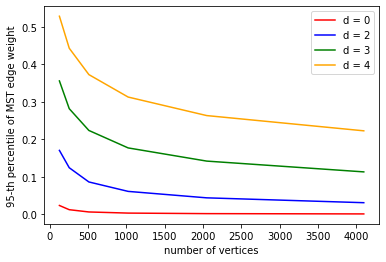

In [10]:
if __name__ == "__main__":
    from matplotlib import pyplot as plt

    l0, = plt.plot(n, f0, color='red')
    l2, = plt.plot(n, f2, color='blue')
    l3, = plt.plot(n, f3, color='green')
    l4, = plt.plot(n, f4, color='orange')
    plt.xlabel('number of vertices')
    plt.ylabel('95-th percentile of MST edge weight')
    plt.title('')
    plt.legend(handles=[l0,l2,l3,l4],labels=['d = 0','d = 2','d = 3','d = 4'],loc='best')
    plt.show()

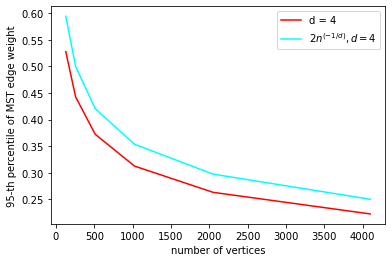

In [17]:
def k(n,r):
    if r == 0: 
        d = 1
    else: d = r
    num = np.array(n)
    return num**(-1/d)

l0,=plt.plot(n, f4, color='red')
l1,=plt.plot(n, 2*k(n,4), color='cyan')
plt.xlabel('number of vertices')
plt.ylabel('95-th percentile of MST edge weight')
plt.title('')
plt.legend(handles=[l0,l1],labels=['d = 4','2$n^{(-1/d)}, d = 4$'],loc='best')

In [126]:
def const(d,f):
    s = np.linspace(4, 1, 100)
    for c in range(len(s)):
        if np.min(s[c]*k(n,d) - f)<=0:
            return np.round(s[c-1],2)
c = [const(1, f0),const(2, f2),const(3, f3),const(4, f4)]
print(c)

[3.15, 2.0, 1.82, 1.79]
